In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [58]:
#df=pd.read_csv("https://raw.githubusercontent.com/benjamin-chan/MedicareProviderCharge/master/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
#df.to_csv('medicare_drg.csv', index=False)
df=pd.read_csv('medicare_drg.csv')
df.reset_index()
df=df.dropna()
df['DRG']=df['DRG Definition'].str[:3]
df['DRG']=df['DRG'].astype('category')
df['Provider State']=df['Provider State'].astype('category')
filter =df['DRG'].isin(['682','683','684'])

encoder=LabelEncoder()

df['Provider State Enc']=encoder.fit_transform(df['Provider State'])


In [46]:
print(df.columns)

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments '],
      dtype='object')


In [47]:
print(df['DRG Definition'].unique())

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC'
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC'
 '069 - TRANSIENT ISCHEMIA'
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC'
 '101 - SEIZURES W/O MCC' '176 - PULMONARY EMBOLISM W/O MCC'
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC'
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC'
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE'
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC'
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC'
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC'
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC'
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC'
 '202 - BRONCHITIS & ASTHMA W CC/MCC'
 '207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS'
 '208 - RES

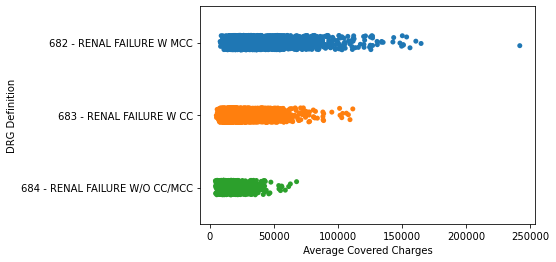

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


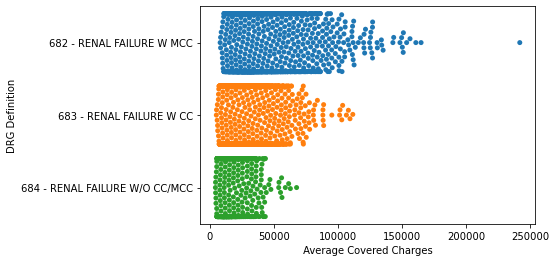

In [48]:
#print(df['DRG'])

#dict={" Average Covered Charges ":"Average Covered Charges"}

#df=df.rename(columns=dict,inplace=True)
#print(df)


#print(df[filter])
sns.stripplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ",jitter=True)
plt.show()

sns.swarmplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ")
plt.show()



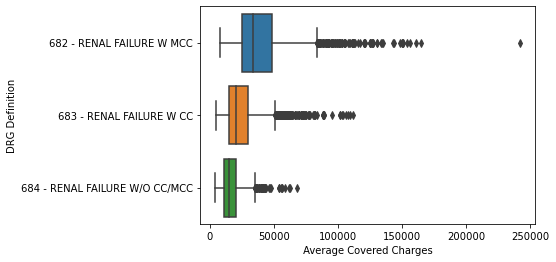

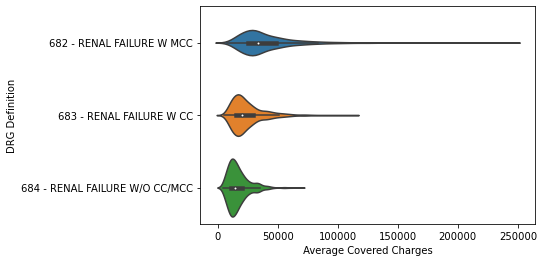

In [18]:
sns.boxplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ")
plt.show()

sns.violinplot(data=df[filter],y="DRG Definition", x=" Average Covered Charges ")
plt.show()

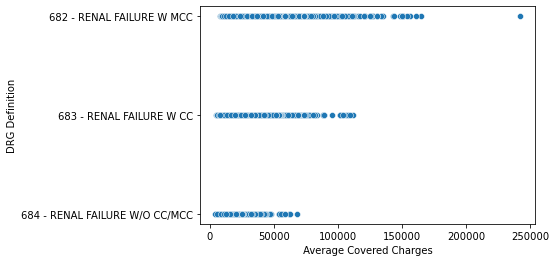

In [19]:
sns.scatterplot(data=df[filter],y="DRG Definition", x=" Average Covered Charges ")
plt.show()

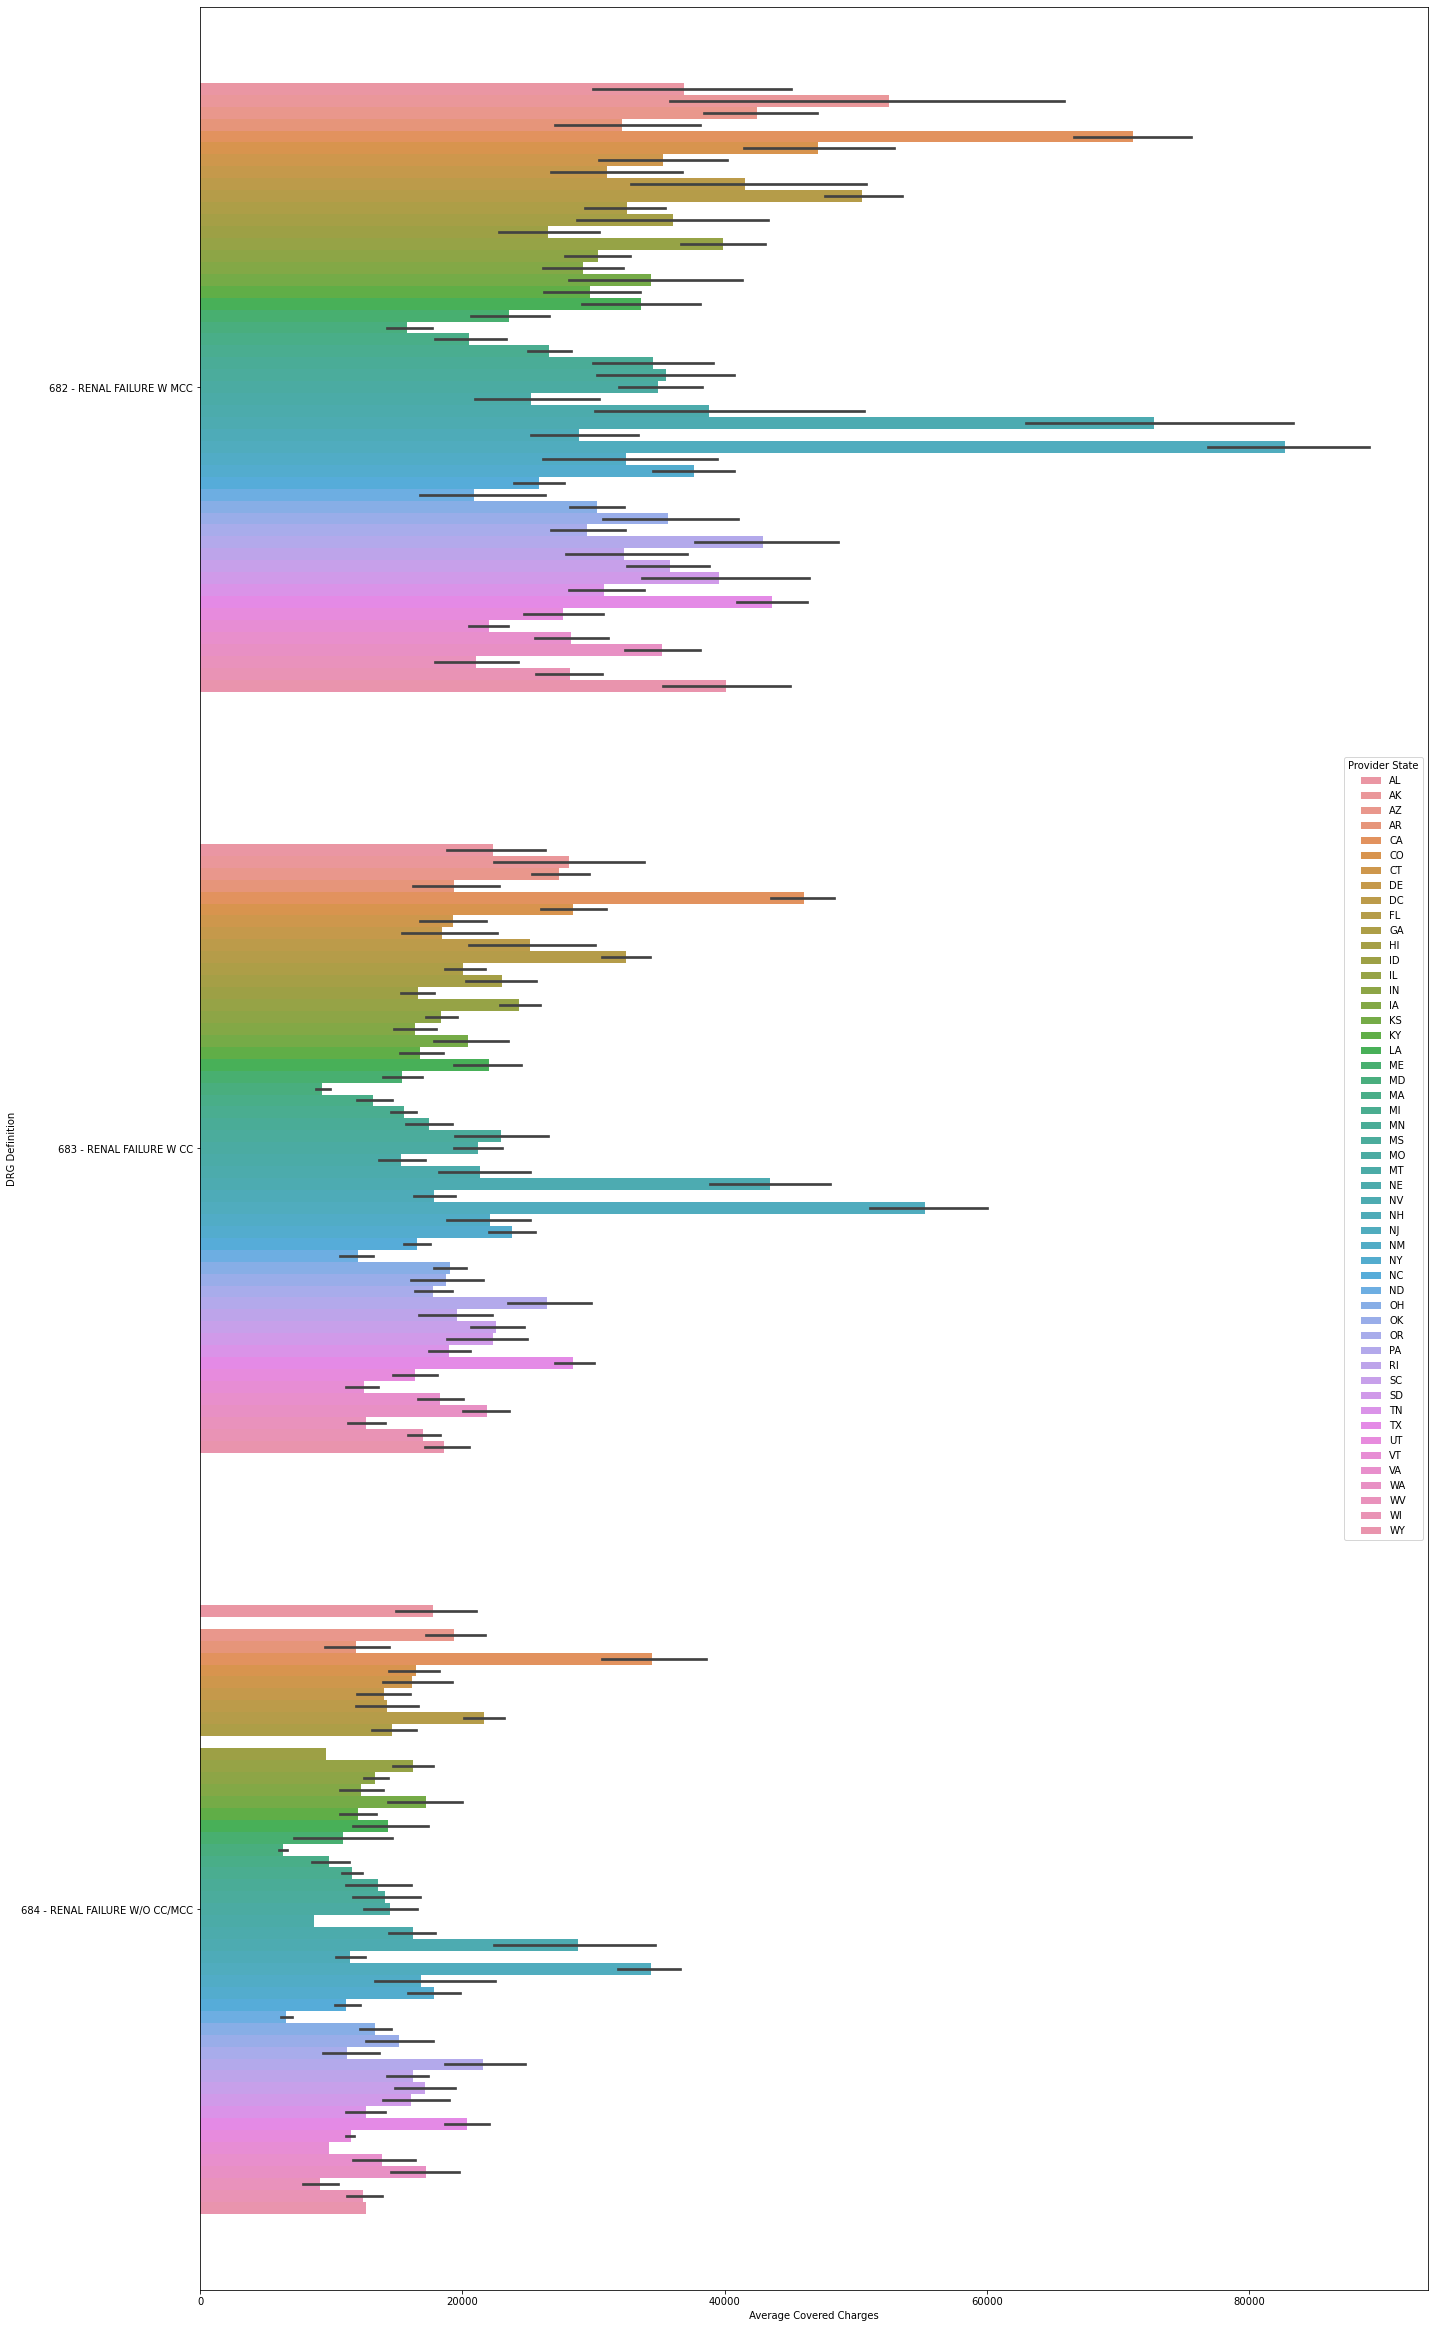

medicare costs vary from state to state


In [20]:
plt.figure(figsize=(22,42))

sns.barplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ", hue='Provider State')
plt.show()

print("medicare costs vary from state to state")

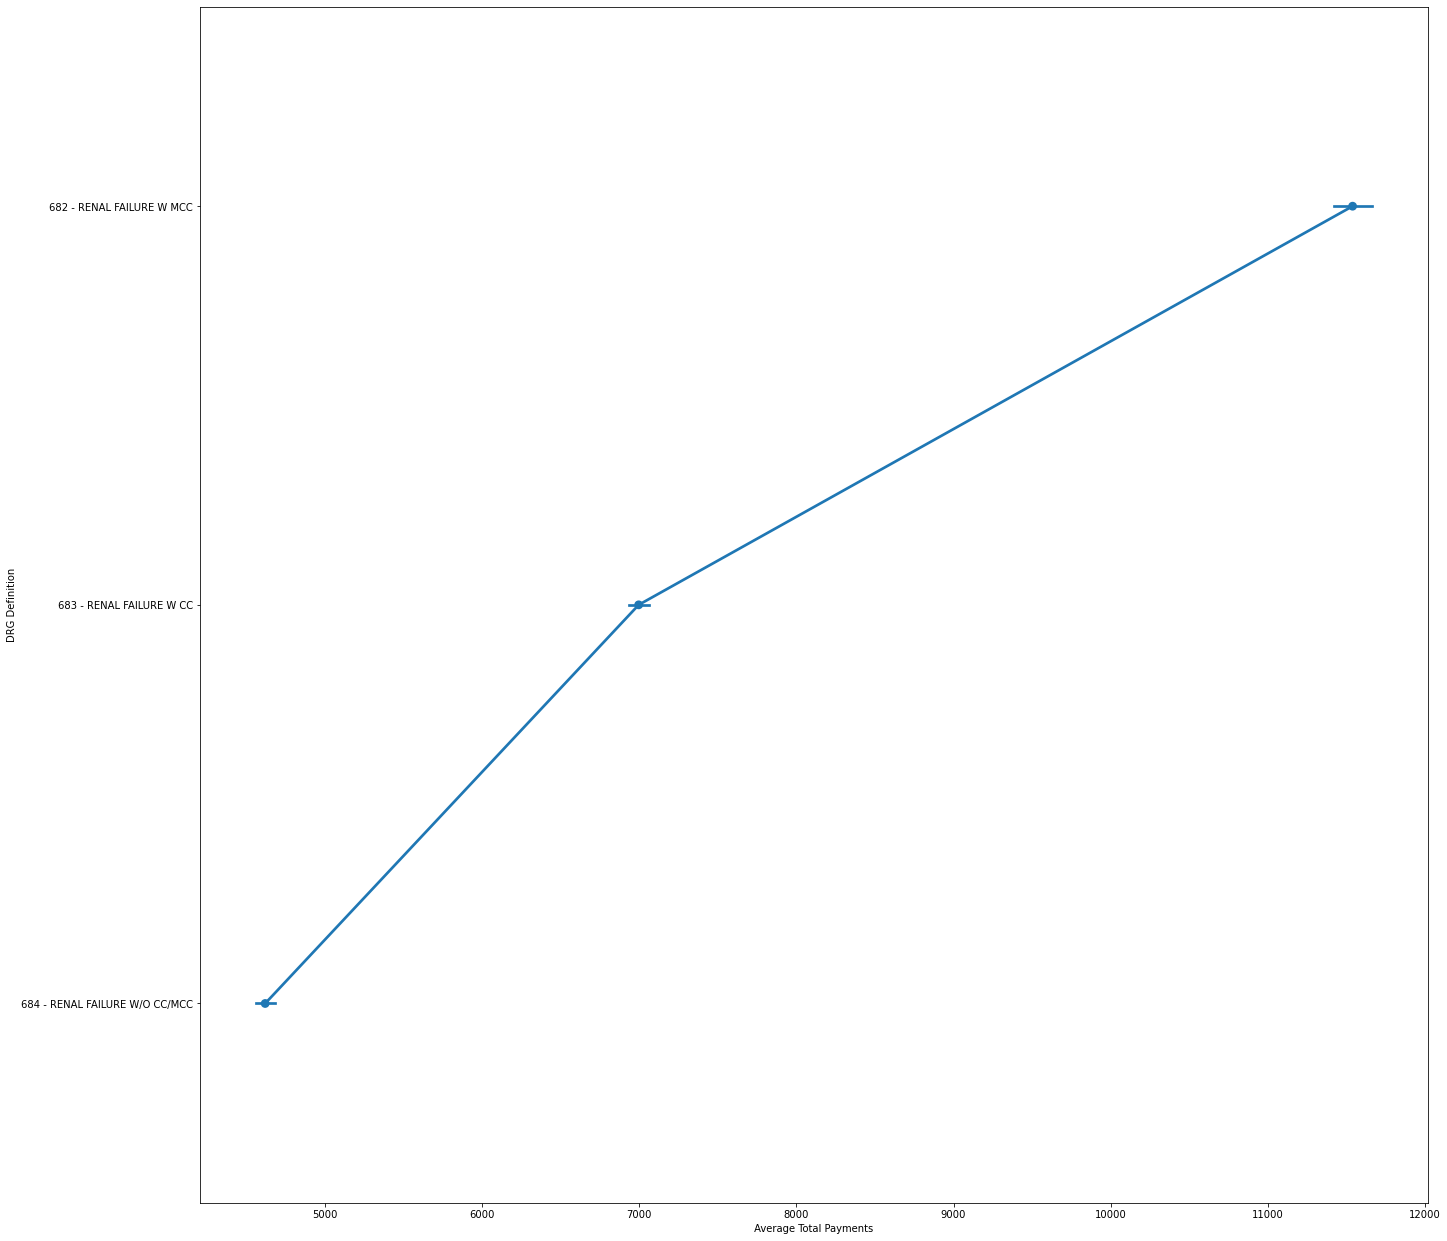

In [60]:
plt.figure(figsize=(22,22))
sns.pointplot(data=df[filter], y="DRG Definition", x=" Average Total Payments ")
plt.show()

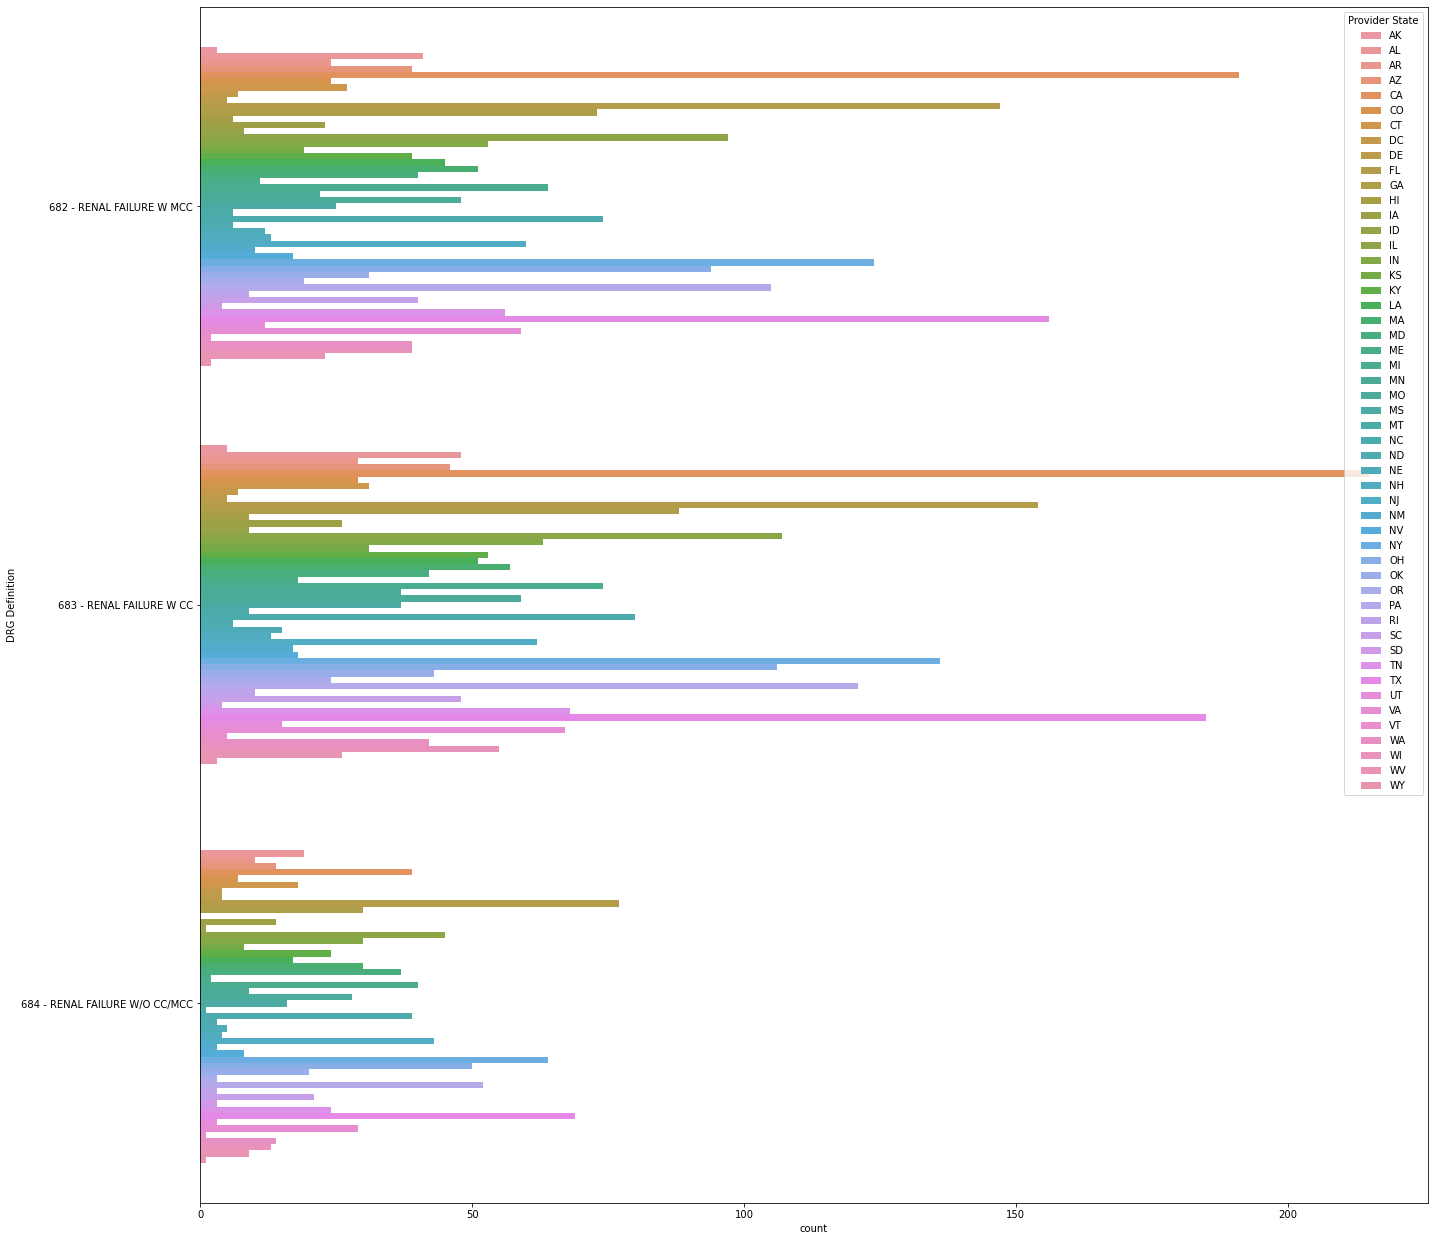

In [61]:
plt.figure(figsize=(22,22))

sns.countplot(data=df[filter], y="DRG Definition", hue='Provider State')
plt.show()

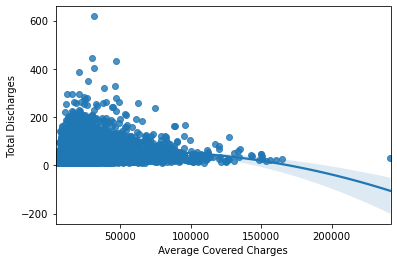

In [62]:

sns.regplot(data=df[filter], y=' Total Discharges ', x=" Average Covered Charges ", order=2)
plt.show()

#order greater than 1 will create a polynomial

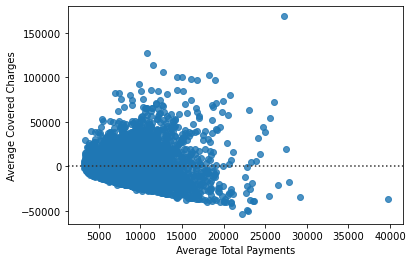

In [63]:
sns.residplot(data=df[filter],y=' Average Covered Charges ',
       x=' Average Total Payments ', order=2)
plt.show()

Avg Charges     12225.017855
Avg Payments     8601.035715
Name: ABBEVILLE GENERAL HOSPITAL, dtype: float64
Avg Charges     30227.239757
Avg Payments     7586.354060
Name: ABBOTT NORTHWESTERN HOSPITAL, dtype: float64
Avg Charges     47376.649725
Avg Payments     7262.653846
Name: ABILENE REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     55078.262487
Avg Payments     8084.088467
Name: ABINGTON MEMORIAL HOSPITAL, dtype: float64
Avg Charges     12899.967030
Avg Payments     7223.760989
Name: ACMH HOSPITAL, dtype: float64
Avg Charges     17651.102740
Avg Payments     6595.610383
Name: ADENA REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     25873.014255
Avg Payments     7675.935307
Name: ADVENTIST BOLINGBROOK HOSPITAL, dtype: float64
Avg Charges     34125.205480
Avg Payments     8353.057091
Name: ADVENTIST LA GRANGE MEMORIAL HOSPITAL, dtype: float64
Avg Charges     27499.927406
Avg Payments     8723.908704
Name: ADVENTIST MEDICAL CENTER, dtype: float64
Avg Charges     25111.37596

Avg Charges     25115.26353
Avg Payments     5599.76839
Name: BLOUNT MEMORIAL HOSPITAL, dtype: float64
Avg Charges     15048.125319
Avg Payments     7822.768543
Name: BLUEFIELD REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     26881.64981
Avg Payments     6284.24260
Name: BOCA RATON REGIONAL HOSPITAL, dtype: float64
Avg Charges     5329.923077
Avg Payments    7217.807692
Name: BOLIVAR GENERAL HOSPITAL, dtype: float64
Avg Charges     29115.454165
Avg Payments     6942.833333
Name: BOLIVAR MEDICAL CENTER, dtype: float64
Avg Charges     17991.242975
Avg Payments     7908.453815
Name: BON SECOURS - DEPAUL MEDICAL CENTER, dtype: float64
Avg Charges     19325.161077
Avg Payments     6477.867553
Name: BON SECOURS - MEMORIAL REGIONAL MEDICAL, dtype: float64
Avg Charges     23180.538460
Avg Payments     9441.837913
Name: BON SECOURS - RICHMOND COMMUNITY HOSPITAL, dtype: float64
Avg Charges     23090.435765
Avg Payments     7928.073785
Name: BON SECOURS - ST FRANCIS MEDICAL CENTER, dtype: 

Name: CHILTON HOSPITAL, dtype: float64
Avg Charges     24951.50000
Avg Payments    12944.47619
Name: CHINO VALLEY MEDICAL CENTER, dtype: float64
Avg Charges     13723.055950
Avg Payments    10130.167855
Name: CHIPPEWA COUNTY WAR MEMORIAL HOSPITAL, dtype: float64
Avg Charges     8529.846154
Avg Payments    5978.076923
Name: CHOCTAW MEMORIAL HOSPITAL, dtype: float64
Avg Charges     59833.182160
Avg Payments     9388.024038
Name: CHRIST HOSPITAL, dtype: float64
Avg Charges     22223.902580
Avg Payments     6588.651764
Name: CHRISTIAN HOSPITAL NORTHEAST, dtype: float64
Avg Charges     18634.456453
Avg Payments     8623.712315
Name: CHRISTIANA CARE HEALTH SERVICES, INC., dtype: float64
Avg Charges     29960.552777
Avg Payments     6275.752778
Name: CHRISTUS HOSPITAL, dtype: float64
Avg Charges     26902.553143
Avg Payments     9547.827429
Name: CHRISTUS SANTA ROSA HOSPITAL, dtype: float64
Avg Charges     22063.854913
Avg Payments     6953.114842
Name: CHRISTUS SCHUMPERT HEALTH SYSTEM, dtype

Avg Charges     12575.400000
Avg Payments     5290.533333
Name: FORT LOUDOUN MEDICAL CENTER, dtype: float64
Avg Charges     11660.36
Avg Payments     6077.00
Name: FORT MADISON COMMUNITY HOSPITAL, dtype: float64
Avg Charges     22095.415410
Avg Payments     7303.575251
Name: FORT SANDERS REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     54695.112790
Avg Payments     6141.524666
Name: FORT WALTON BEACH MEDICAL CENTER, dtype: float64
Avg Charges     82375.706160
Avg Payments    13451.859052
Name: FOUNTAIN VALLEY REGIONAL HOSPITAL & MEDICAL CENTER, dtype: float64
Avg Charges     19491.000417
Avg Payments     6451.293860
Name: FRANCISCAN ST ANTHONY HEALTH - CROWN POINT, dtype: float64
Avg Charges     18882.294505
Avg Payments     6472.201192
Name: FRANCISCAN ST ANTHONY HEALTH - MICHIGAN CITY, dtype: float64
Avg Charges     22005.25000
Avg Payments     7512.77694
Name: FRANCISCAN ST ELIZABETH HEALTH - LAFAYETTE CENTRAL, dtype: float64
Avg Charges     27053.255210
Avg Payments     7986

Name: JOHN MUIR MEDICAL CENTER - CONCORD CAMPUS, dtype: float64
Avg Charges     94842.727023
Avg Payments    10095.036622
Name: JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS, dtype: float64
Avg Charges     41237.187480
Avg Payments     6353.856353
Name: JOHN RANDOLPH MEDICAL CENTER, dtype: float64
Avg Charges     39606.577223
Avg Payments     7735.014699
Name: JOHN T MATHER MEMORIAL HOSPITAL  OF PORT JEFFERSON, dtype: float64
Avg Charges     12178.728413
Avg Payments    11460.877988
Name: JOHNS HOPKINS BAYVIEW MEDICAL CENTER, dtype: float64
Avg Charges     22104.550306
Avg Payments    20806.892477
Name: JOHNS HOPKINS HOSPITAL, THE, dtype: float64
Avg Charges     30518.005910
Avg Payments     8168.505044
Name: JOHNSON CITY MEDICAL CENTER, dtype: float64
Avg Charges     21609.457293
Avg Payments     8008.649999
Name: JOHNSON MEMORIAL HOSPITAL, dtype: float64
Avg Charges     27510.474576
Avg Payments     7925.568547
Name: JOHNSTON MEMORIAL HOSPITAL, dtype: float64
Avg Charges     8254.73

Name: MAYO CLINIC, dtype: float64
Avg Charges     22281.821090
Avg Payments    10119.102651
Name: MAYO CLINIC - SAINT MARYS HOSPITAL, dtype: float64
Avg Charges     9846.0625
Avg Payments    5923.0000
Name: MAYO CLINIC HEALTH SYSTEM - ALBERT LEA, dtype: float64
Avg Charges     13554.117650
Avg Payments     6187.823529
Name: MAYO CLINIC HEALTH SYSTEM - AUSTIN, dtype: float64
Avg Charges     10854.6
Avg Payments     7701.0
Name: MAYO CLINIC HEALTH SYSTEM - FAIRMONT, dtype: float64
Avg Charges     21749.573550
Avg Payments     8666.020245
Name: MAYO CLINIC HEALTH SYSTEM - MANKATO, dtype: float64
Avg Charges     18592.035457
Avg Payments     7008.039479
Name: MAYO CLINIC HEALTH SYSTEM EAU CLAIRE HOSPITAL, dtype: float64
Avg Charges     21384.472223
Avg Payments     7579.211112
Name: MAYO CLINIC HLTH SYSTEM- FRANCISCAN MED CTR, INC, dtype: float64
Avg Charges     25014.56800
Avg Payments    10330.72973
Name: MAYO CLINIC HOSPITAL, dtype: float64
Avg Charges     38820.633335
Avg Payments    1

Name: NORTHSIDE MEDICAL CENTER, dtype: float64
Avg Charges     26248.383400
Avg Payments     6464.973973
Name: NORTHWEST COMMUNITY HOSPITAL, dtype: float64
Avg Charges     25492.092030
Avg Payments     6857.474634
Name: NORTHWEST HOSPITAL, dtype: float64
Avg Charges     9954.850745
Avg Payments    9366.750997
Name: NORTHWEST HOSPITAL CENTER, dtype: float64
Avg Charges     45439.517342
Avg Payments     7047.455240
Name: NORTHWEST MEDICAL CENTER, dtype: float64
Avg Charges     30806.110200
Avg Payments     8195.982371
Name: NORTHWEST MISSISSIPPI REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     29622.32537
Avg Payments     8819.20956
Name: NORTHWEST TEXAS HOSPITAL, dtype: float64
Avg Charges     9791.181818
Avg Payments    9110.000000
Name: NORTHWESTERN MEDICAL CENTER INC, dtype: float64
Avg Charges     34840.58689
Avg Payments     9908.24298
Name: NORTHWESTERN MEMORIAL HOSPITAL, dtype: float64
Avg Charges     14889.407410
Avg Payments     5744.259259
Name: NORTON COMMUNITY HOSPITA

Avg Charges     40072.001097
Avg Payments    10729.206044
Name: RIVERSIDE COUNTY REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     21837.441937
Avg Payments     7591.031306
Name: RIVERSIDE MEDICAL CENTER, dtype: float64
Avg Charges     24283.518007
Avg Payments     7130.906044
Name: RIVERSIDE METHODIST HOSPITAL, dtype: float64
Avg Charges     18358.080685
Avg Payments    10026.695629
Name: RIVERSIDE REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     20220.929910
Avg Payments     7450.587054
Name: RIVERSIDE SHORE MEMORIAL HOSPITAL, dtype: float64
Avg Charges     14120.64
Avg Payments     6609.40
Name: RIVERSIDE TAPPAHANNOCK HOSPITAL, dtype: float64
Avg Charges     15690.392775
Avg Payments     6473.671329
Name: RIVERSIDE WALTER REED HOSPITAL, dtype: float64
Avg Charges     10335.33333
Avg Payments     4854.00000
Name: RIVERTON HOSPITAL, dtype: float64
Avg Charges     20695.98276
Avg Payments     7414.87849
Name: RIVERVIEW HOSPITAL, dtype: float64
Avg Charges     15541.217870


Avg Charges     25569.115650
Avg Payments     7361.265419
Name: SKOKIE HOSPITAL, dtype: float64
Avg Charges     21276.038095
Avg Payments    10339.900002
Name: SKY LAKES MEDICAL CENTER, dtype: float64
Avg Charges     43829.038460
Avg Payments     7728.393029
Name: SKY RIDGE MEDICAL CENTER, dtype: float64
Avg Charges     36123.315430
Avg Payments     8035.058321
Name: SKYLINE MEDICAL CENTER, dtype: float64
Avg Charges     30962.168833
Avg Payments     5835.291937
Name: SKYRIDGE MEDICAL CENTER, dtype: float64
Avg Charges     45018.616015
Avg Payments     7694.330066
Name: SLIDELL MEMORIAL HOSPITAL AND MEDICAL CENTER, dtype: float64
Avg Charges     28480.72689
Avg Payments     7021.87605
Name: SMITH NORTHVIEW HOSPITAL, dtype: float64
Avg Charges     18961.696835
Avg Payments     7267.954023
Name: SMYTH COUNTY COMMUNITY HOSPITAL, dtype: float64
Avg Charges     13335.5
Avg Payments     7079.0
Name: SOLDIERS AND SAILORS MEMORIAL HOSPITAL, dtype: float64
Avg Charges     25404.593420
Avg Payme

Name: TRINITY MUSCATINE, dtype: float64
Avg Charges     17593.380128
Avg Payments     6295.091987
Name: TRINITY REGIONAL MEDICAL CENTER, dtype: float64
Avg Charges     14938.759249
Avg Payments     6342.725906
Name: TRINITY ROCK ISLAND, dtype: float64
Avg Charges     28273.084575
Avg Payments     8986.090722
Name: TRMC OF ORANGEBURG & CALHOUN, dtype: float64
Avg Charges     15564.378177
Avg Payments    10676.962700
Name: TRUMAN MEDICAL CENTER HOSPITAL HILL, dtype: float64
Avg Charges     39729.825140
Avg Payments     7588.900273
Name: TRUMBULL MEMORIAL HOSPITAL, dtype: float64
Avg Charges     8350.375
Avg Payments    5100.625
Name: TRUSTPOINT HOSPITAL, dtype: float64
Avg Charges     28951.106820
Avg Payments     8979.788635
Name: TUALITY COMMUNITY HOSPITAL, dtype: float64
Avg Charges     22843.133157
Avg Payments     7704.333428
Name: TUCSON MEDICAL CENTER, dtype: float64
Avg Charges     17825.998685
Avg Payments    13745.901580
Name: TUFTS MEDICAL CENTER, dtype: float64
Avg Charges   

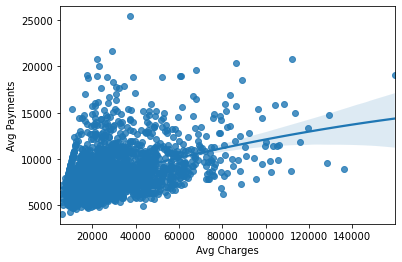

In [64]:
providers_avg_charges=df[filter].groupby('Provider Name')[' Average Covered Charges '].mean()

providers_avg_payments=df[filter].groupby('Provider Name')[' Average Total Payments '].mean()


result=pd.DataFrame({'Avg Charges':providers_avg_charges,'Avg Payments': providers_avg_payments})

for key,item in result.iterrows():
    print(item)

sns.regplot(data=result,x='Avg Charges',
       y='Avg Payments', order=2)
plt.show()


DRG                                            682           683     684
Provider Name                                                           
JOHNS HOPKINS HOSPITAL, THE            39756.40299  14572.774440  8091.5
MAIMONIDES MEDICAL CENTER              24403.26168  13001.659570     NaN
NEWARK BETH ISRAEL MEDICAL CENTER      23081.21569  12139.560000     NaN
LONG ISLAND JEWISH MEDICAL CENTER      21147.34211  11874.981480     NaN
LUTHERAN MEDICAL CENTER                20902.62264  12481.506170     NaN
...                                            ...           ...     ...
WILLIAM N WISHARD MEMORIAL HOSPITAL            NaN   9363.637931     NaN
WILLIAMSPORT REGIONAL MEDICAL CENTER           NaN   6270.875000     NaN
WILLIS KNIGHTON BOSSIER HEALTH CENTER          NaN   5480.015873     NaN
WINCHESTER HOSPITAL                            NaN   6593.293478     NaN
YAKIMA VALLEY MEMORIAL HOSPITAL                NaN   7256.447761     NaN

[1163 rows x 3 columns]


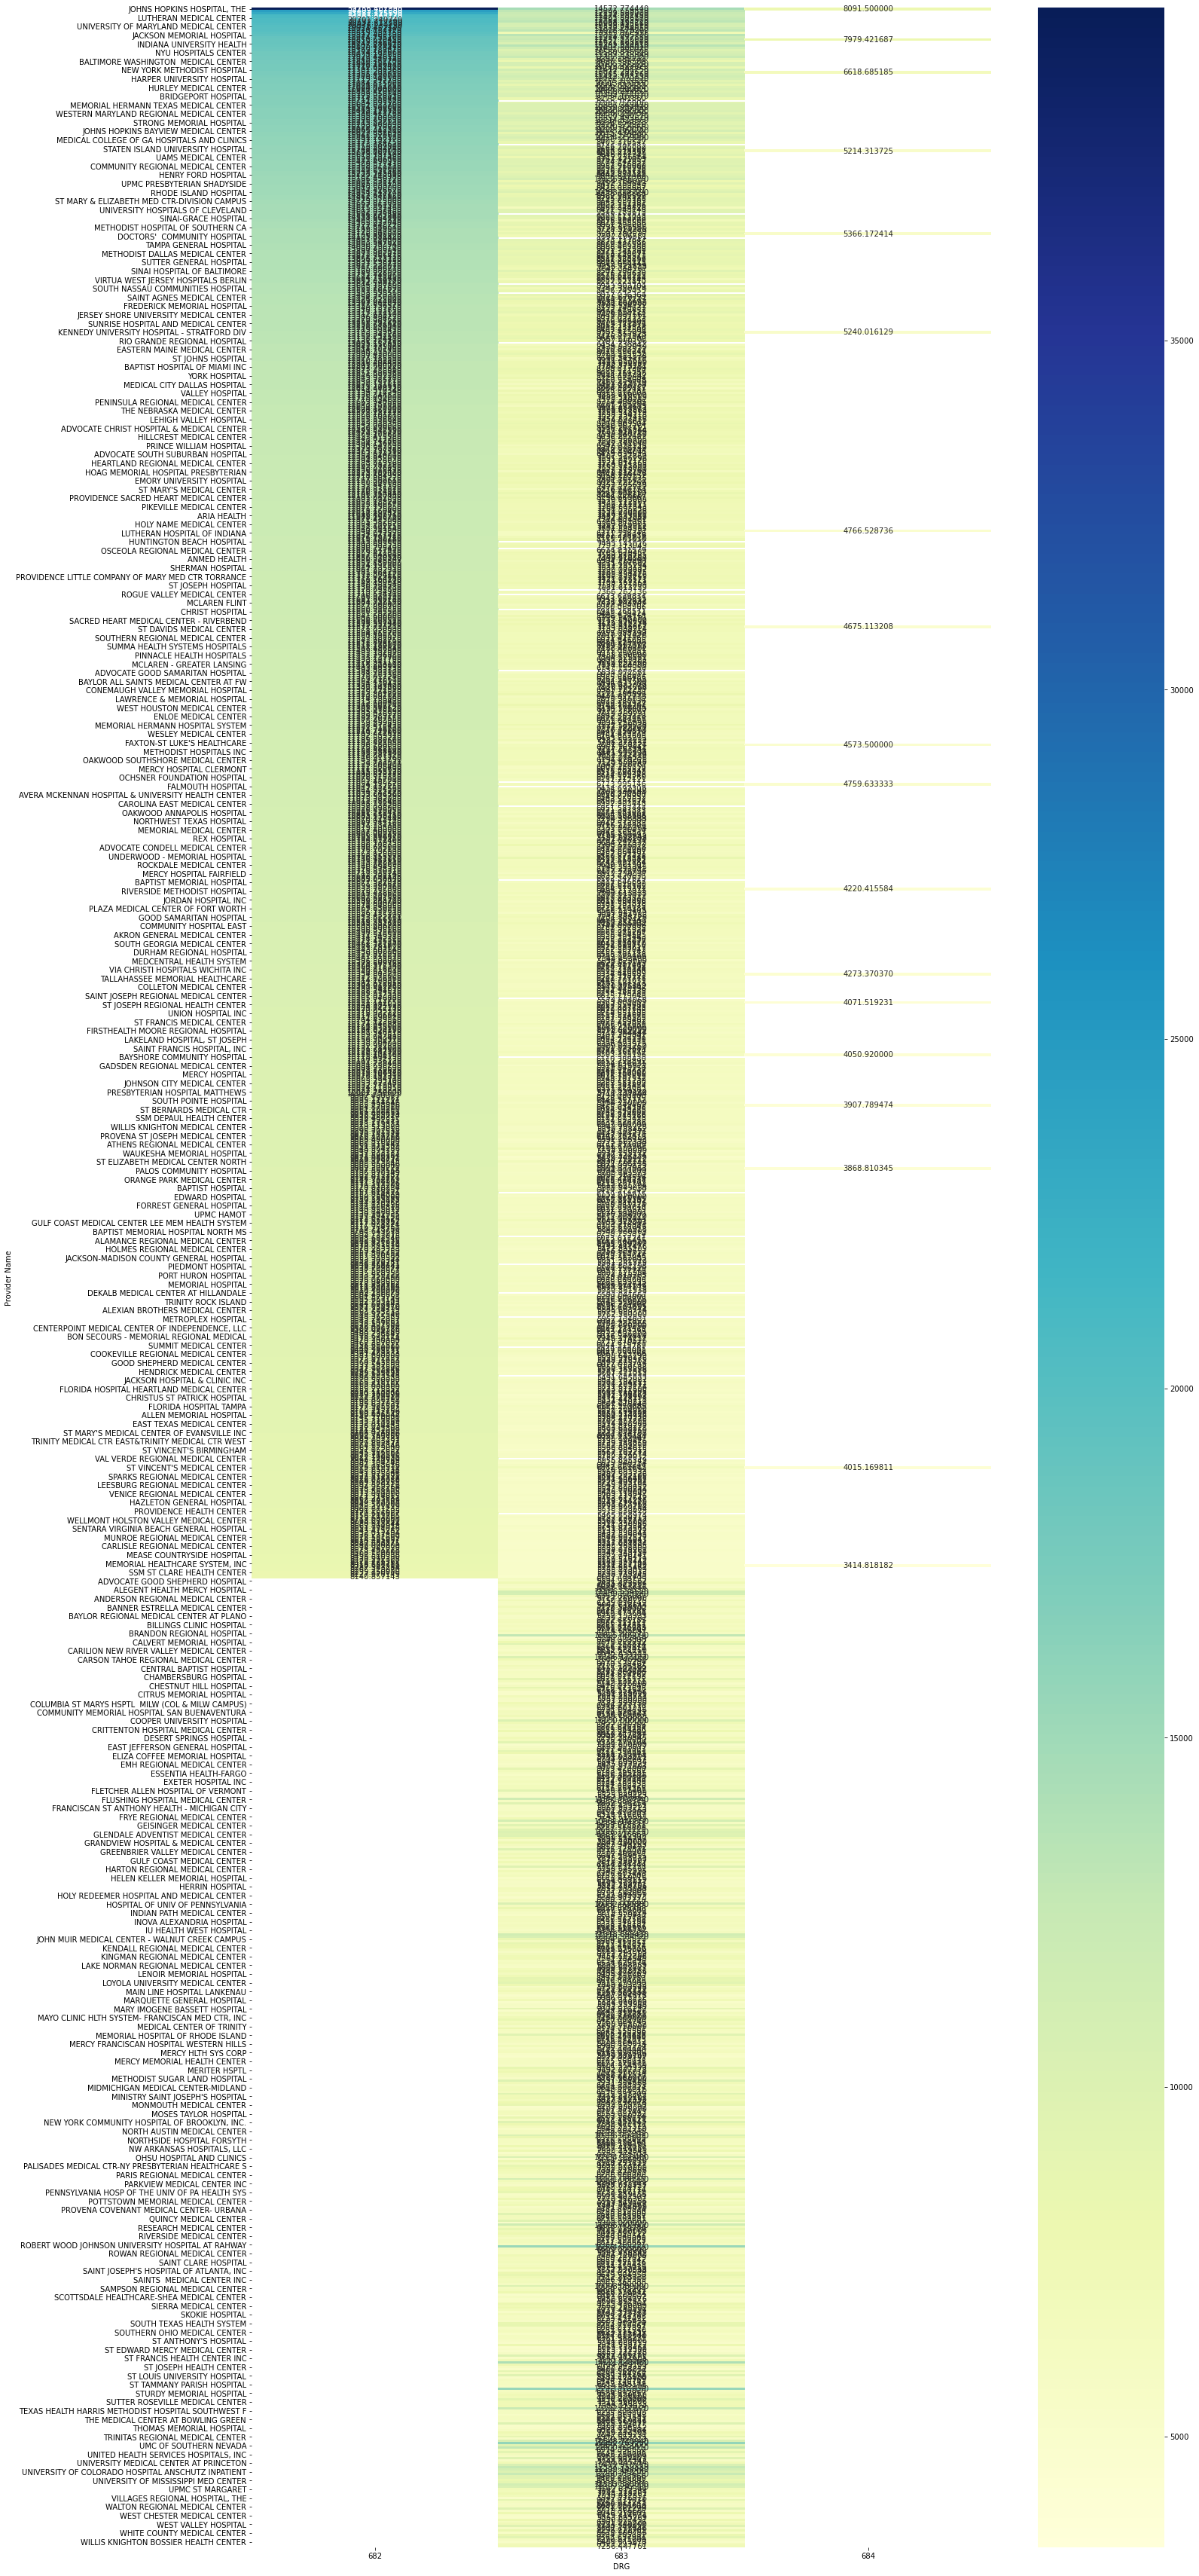

In [73]:
filter =(df['DRG'].isin(['682','683','684'])) & (df[' Total Discharges ']>=50)

result=df[filter]


ct=pd.crosstab(result['Provider Name'],result['DRG'],
values=result[' Average Total Payments '], aggfunc='mean')

ct=ct.sort_values(by='682', ascending=False)
print(ct)

fig,ax=plt.subplots(figsize=(22,62))
sns.heatmap(ct,annot=True,fmt='f',
cmap='YlGnBu', cbar=True, ax=ax)

#plt.yticks(rotation=0)
#plt.xticks(rotation=90)

plt.show()

<AxesSubplot:>

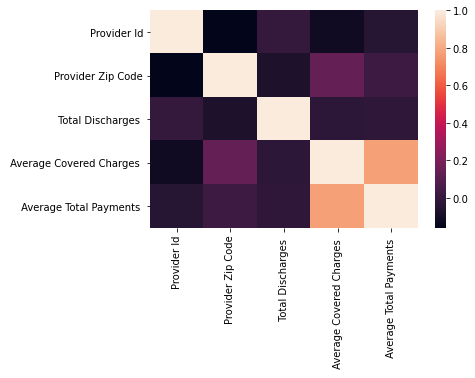

In [30]:

sns.heatmap(df.corr())

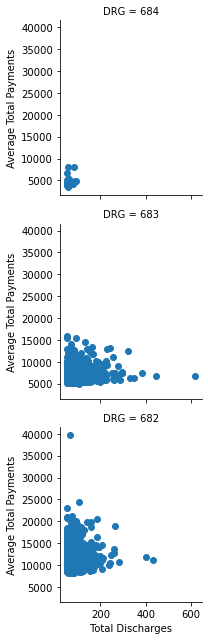

<Figure size 432x288 with 0 Axes>

In [31]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df[filter], row="DRG", row_order=['684','683','682'])

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, ' Total Discharges ', ' Average Total Payments ')

plt.show()
plt.clf()

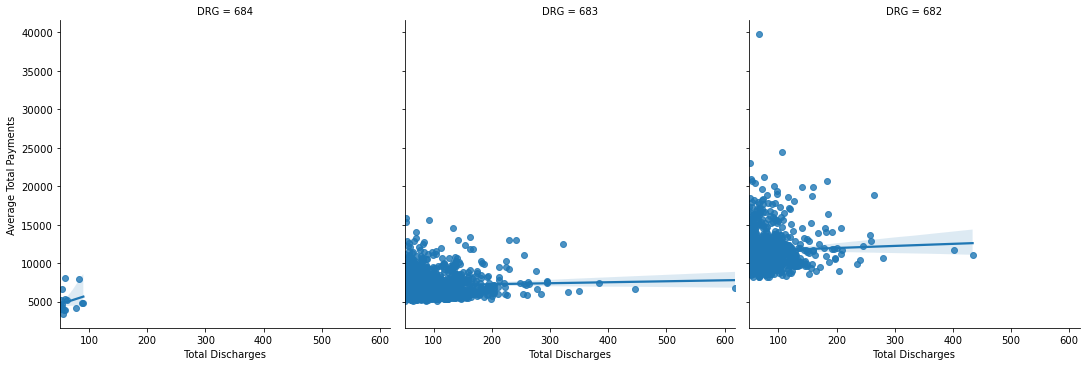

<Figure size 432x288 with 0 Axes>

In [32]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df[filter],
        x=' Total Discharges ',
        y=' Average Total Payments ',
        col="DRG",
        col_order=['684','683','682'])

plt.show()
plt.clf()



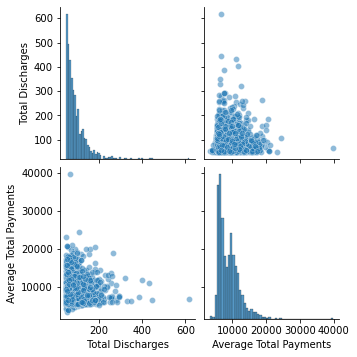

<Figure size 432x288 with 0 Axes>

In [33]:
sns.pairplot(data=df[filter],
        vars=[' Total Discharges ',' Average Total Payments '],
        palette='husl', plot_kws={'alpha':0.5})

plt.show()
plt.clf()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: distplot() got an unexpected keyword argument 'y'

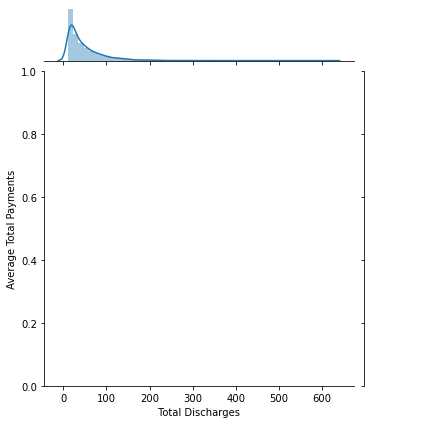

In [38]:
g=sns.JointGrid(data=df[filter], x=' Total Discharges ', y=' Average Total Payments ')
g.plot(sns.regplot, sns.distplot)
plt.show()

g=sns.JointGrid(data=df[filter], x=' Total Discharges ', y=' Average Total Payments ')
g=g.plot_joint(sns.kdeplot)
g=g.plot_marginals(sns.kdeplot, shade=True)
g=g.annotate(stats.pearsonr)

plt.show()

In [ ]:
g=sns.jointplot(data=df[filter], x=' Total Discharges ', y=' Average Total Payments ', kind='hex')
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:2036: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


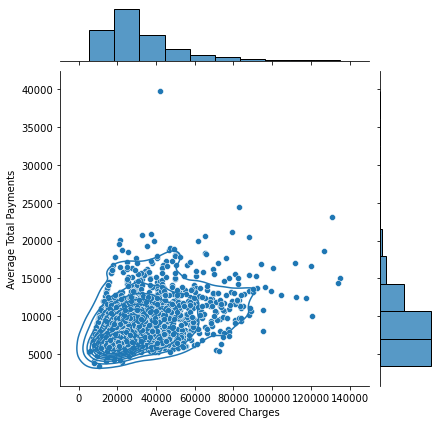

<Figure size 432x288 with 0 Axes>

In [35]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x=" Average Covered Charges ",
             y=" Average Total Payments ",
             kind='scatter',
             data=df[filter],
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()